In [3]:
#global projects 
projects= ["lucida", "word", "anonymouth","h2o-2","phimpme-android", "GeometricWeather", "Arduino" ,"lbry-android", "litho", "PictureSelector", "SmarterStreaming", "lawnchair", "NekoX", "hudi", "PojavLauncher", "beam" ]
colours_for_projects = ["red","red","red","red", "red", "red","red", "red","green","green","green", "green","green","green","green", "green"]

if len(projects) != len(colours_for_projects):
    print("\n Lists are NOT the same length!! Check you input\n\n")
    print(f"{len(projects)} vs {len(colours_for_projects)}")
else:
    print("input lists are the same length")

input lists are the same length


In [2]:
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt



# line chart
def line_chart(label:str, entity:str, data:list):
    """
    Plots a line chart for the entered data. 

    Parameters:
    entity (str): The character whose sentiment is being analyzed.
    data (list): List of sentiment scores corresponding to each chapter.

    This function creates a line chart with number of classes on the x-axis and value in data list the y-axis, 
    """

    plt.figure(figsize=(25, 10))
    plt.plot(list(range(len(data))) , data, marker='o', linestyle='-', color='b')
    plt.title(f'Value of {entity} per class')
    plt.xlabel('Class')
    plt.ylabel(f'{label}')
    plt.grid(True)
    
    # Setting axis limits
    plt.xlim(left=0)  # Adjust as necessary to cut off empty initial values

    
    plt.show()
    
    
# line chart for two characters 
def double_line_chart(entity, min_data, max_data):
    """
    Plots a line chart comparing the sentiments of two entities over time.

    Parameters:
    entity1 (str): The first character for comparison.
    entity2 (str): The second character for comparison.
    data1 (list): List of sentiment scores for the first entity corresponding to each chapter.
    data2 (list): List of sentiment scores for the second entity corresponding to each chapter.

    This function creates a comparative line chart for two entities, showing their sentiment trends across chapters.
    """
    plt.figure(figsize=(25, 10))

    plt.plot(projects, min_data, marker='o', color='blue', label=f"min {entity} value")
    plt.plot(projects, max_data, marker='s', color='green', label=f"max {entity} value")

    plt.title(f'Minimum and Maximum for every project of metric {entity}')
    plt.xlabel('Project')
    plt.ylabel(f'{entity} Value')
    plt.legend()
    plt.show()
    
    


def double_line_chart_coloured(entity, min_data, max_data):
    plt.figure(figsize=(25, 10))


    # Plotting the minimum values
    for i in range(len(min_data)):
        color = "red" if i > 3 else "green"
        plt.plot(i, min_data[i], color= color, marker='o', label=f"{projects[i]}")
        plt.plot(i, max_data[i], color= color, marker='x', label=f"{projects[i]}")

    plt.title(f'Minimum and Maximum for every project of metric {entity}')
    plt.xlabel('Project')
    plt.ylabel(f'{entity} Value')
    plt.legend()
    plt.show()





   
def histogram(label, entity, data):
        # Creating a histogram
    plt.hist(data)
    plt.xlabel('Value')
    plt.ylabel(f'{label}')
    plt.title(f'Histogram of Value Distribution for {entity}')
    plt.show()
        
def log_histogram(label, entity, data):

    plt.hist(data, log=True, edgecolor='black')
    plt.title(f"Logarithmic Scale Histogram of {label}")
    plt.xlabel("Value")
    plt.ylabel(f"Frequency (Log Scale) of {entity} values")
    plt.show()

        
def boxplot(entity, data):
    sns.boxplot(data=data)
    plt.title(f"Box Plot of {entity}")
    plt.show()
    

def bar_chart(categories:list[str], values:list[float], colours:list[str], entity:str):
        
 
    plt.figure(figsize=(40, 6))
    plt.bar(categories, values, color=colours, edgecolor='black', width=0.8)  # Color and edgecolor are optional
    # Adding labels and title
    plt.xlabel('Categories')
    plt.ylabel(f'{entity} values')
    plt.title(f'{entity}')
    plt.show()
    


def data_prep(metric_index:int, requested_projects=None):
    """
    Prepare and fetch data for visualization.
    """

    global projects
    project_paths: list[str] = []
    
    if requested_projects is not None:
        projects = requested_projects
    
    
    absolute_path = os.path.abspath(os.getcwd())
    
    data = {}

    for project in projects:
        project_path = os.path.join(absolute_path, project)
        project_paths.append(project_path)
    
        project_csv_path = os.path.join(project_path , project + "class.csv")
        with open(project_csv_path, "r", encoding="UTF8") as project_csv:
    
         
            reader = csv.reader(project_csv)
            data_list = []
            next(reader)  # Skip the header
            for idx, row in enumerate(reader, start=1):
                #print(row[metric_index])
                if len(row) > metric_index:
                    data_list.append(int(row[metric_index]))
                    
        data[project] = data_list
        
        
        #print(data_list)
        
    return data


    
def weighted_data_prep(metric_index:int, requested_projects=None):
    """
    Prepare and fetch data for visualization.
    """

    global projects
    project_paths: list[str] = []
    
    if requested_projects is not None:
        projects = requested_projects
    
    
    absolute_path = os.path.abspath(os.getcwd())
    
    data = {}
    weight_index = 15 #at index 10 is totalMethodsQty

    for project in projects:
        project_path = os.path.join(absolute_path, project)
        project_paths.append(project_path)
    
        project_csv_path = os.path.join(project_path , project + "class.csv")
        with open(project_csv_path, "r", encoding="UTF8") as project_csv:
    
         
            reader = csv.reader(project_csv)
            data_list = []
            next(reader)  # Skip the header
            for idx, row in enumerate(reader, start=1):
                #print(row[metric_index])
                #print(f"weight for {project} = {(row[weight_index])}")
                if len(row) > metric_index and int(row[weight_index]) != 0:
                    data_list.append((int((row[metric_index])) / (int(row[weight_index]))))
                    
        data[project] = data_list
        
    return data
    


-------------------------
 weighted average CBO over entire project, should be low 


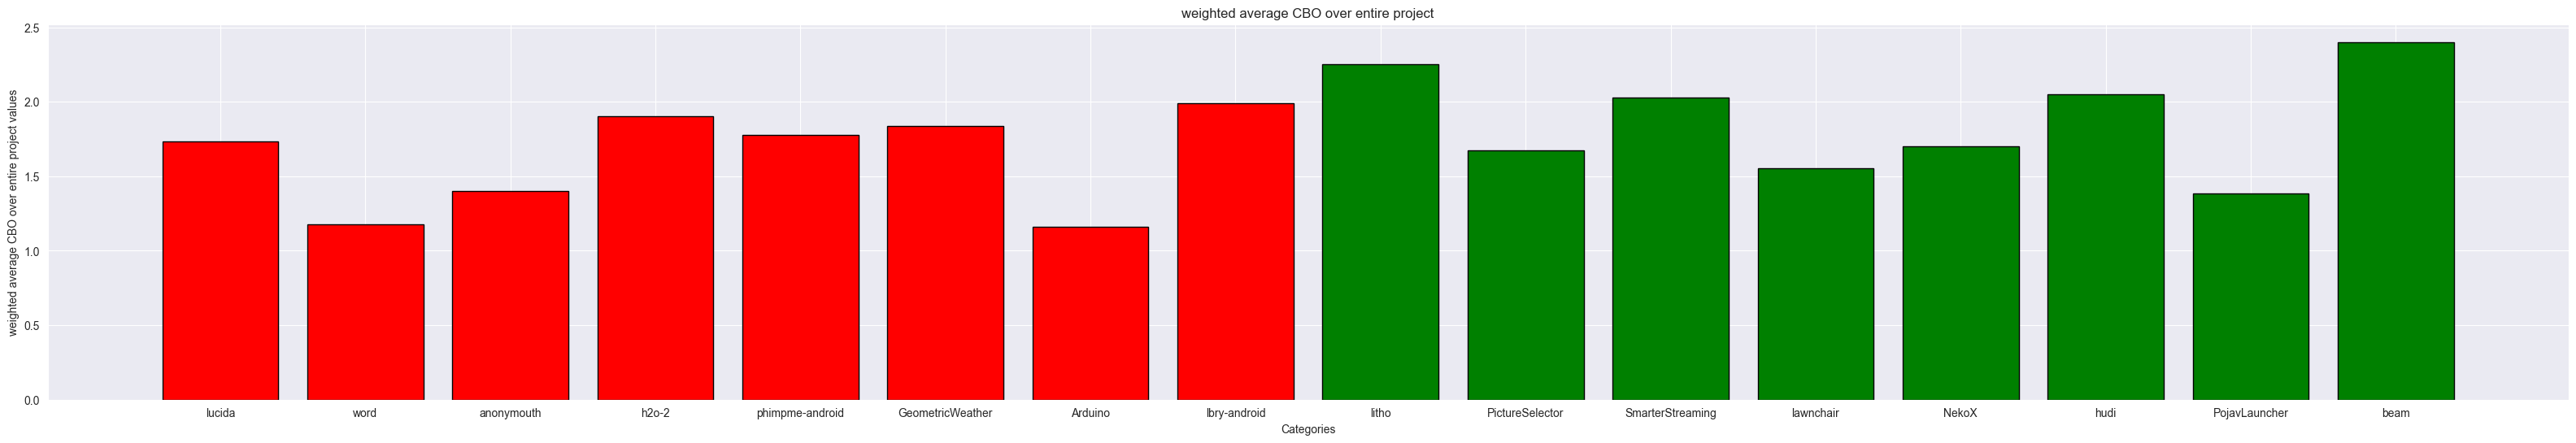

-------------------------
 average CBO over entire project, should be low 


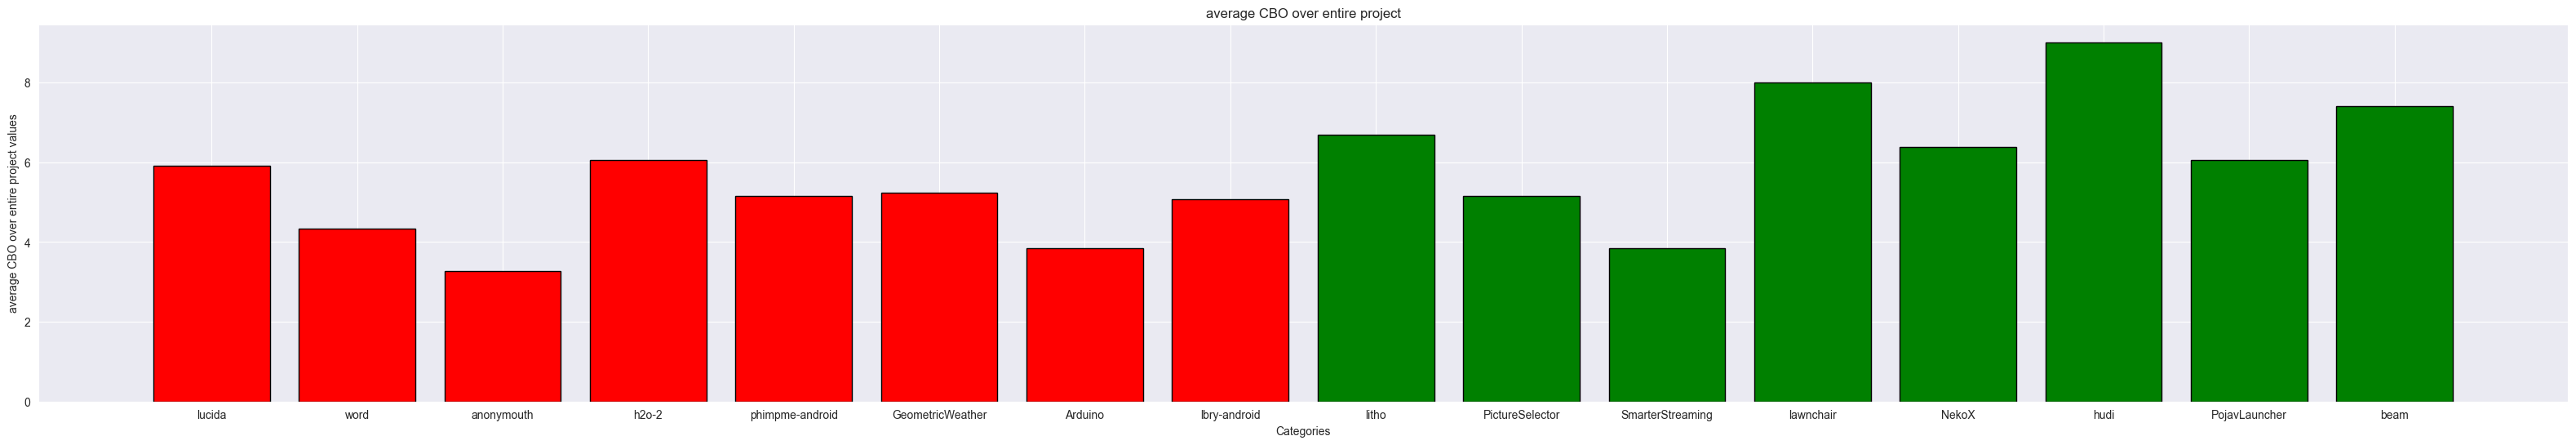

-------------------------
 weighted average WMC over entire project , should be low 


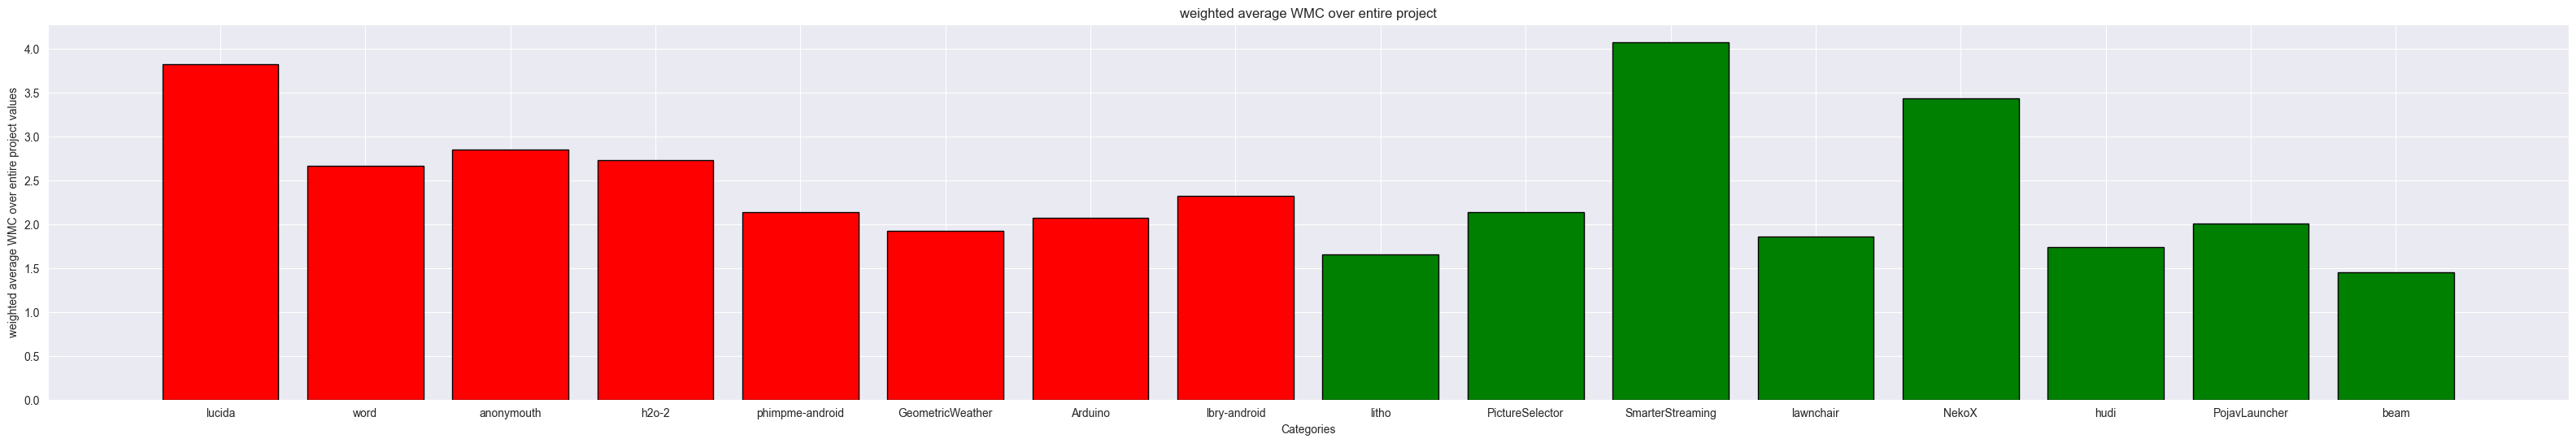

-------------------------
 weighted average DIT over entire project, should be low 


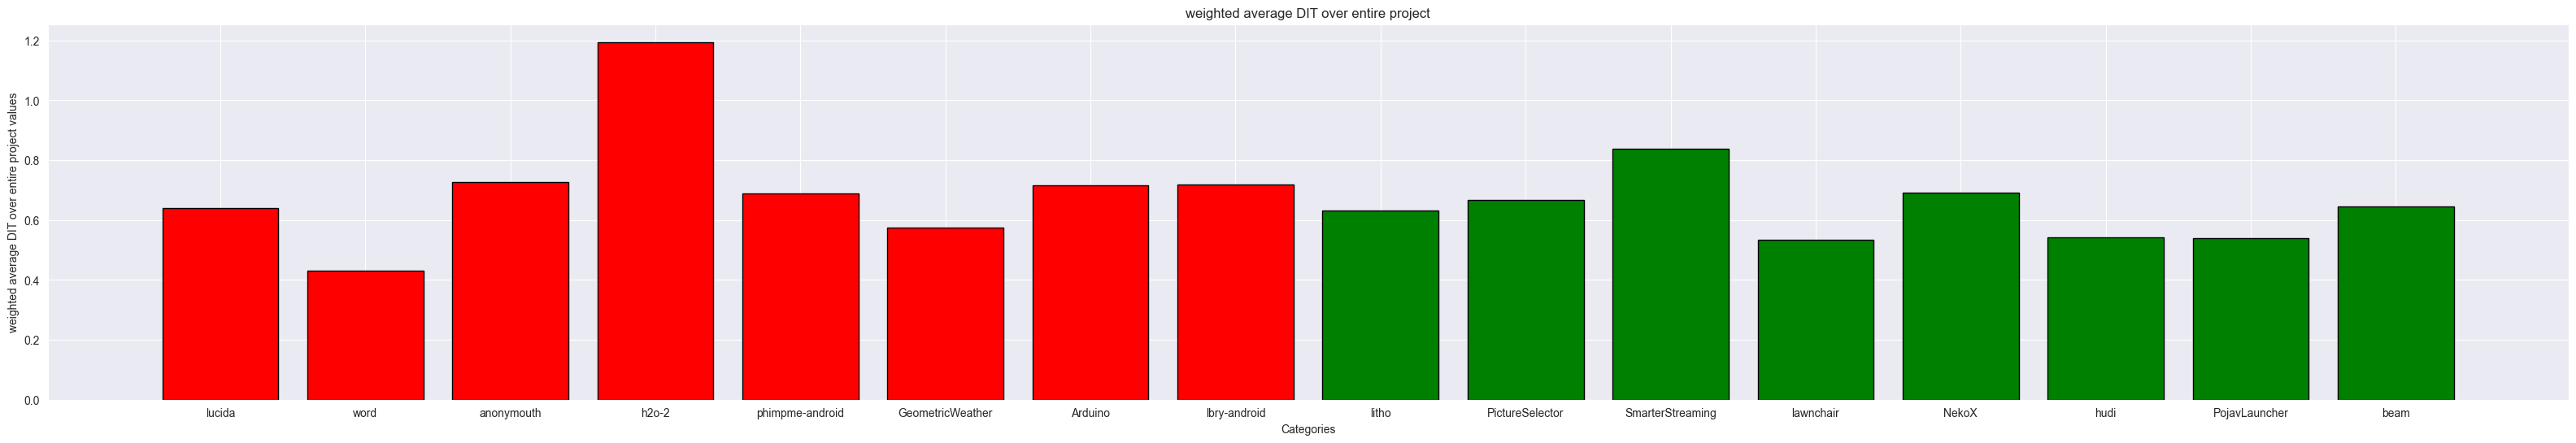

-------------------------
 weighted average NCO over entire project , should be high 


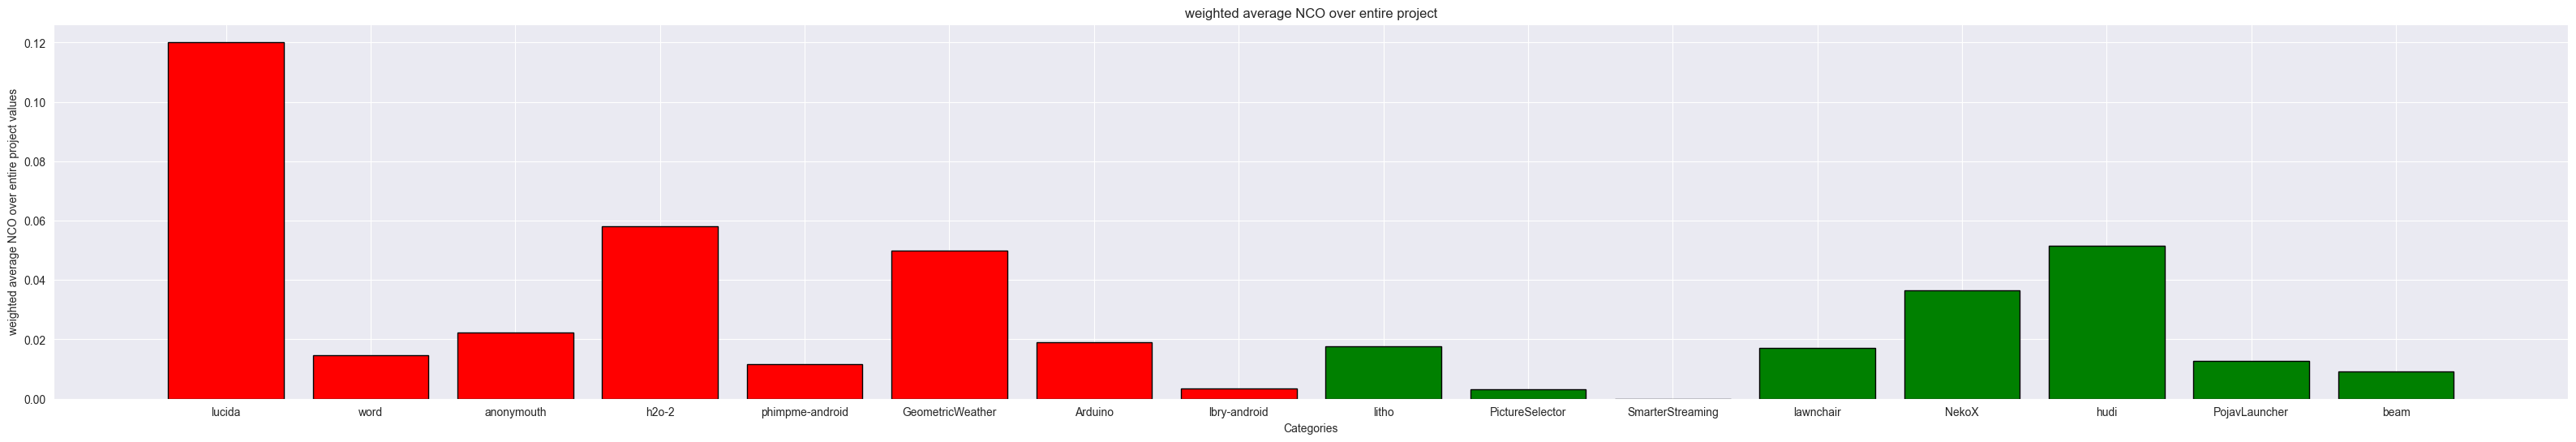

-------------------------
 average NCO over entire project , should be high 


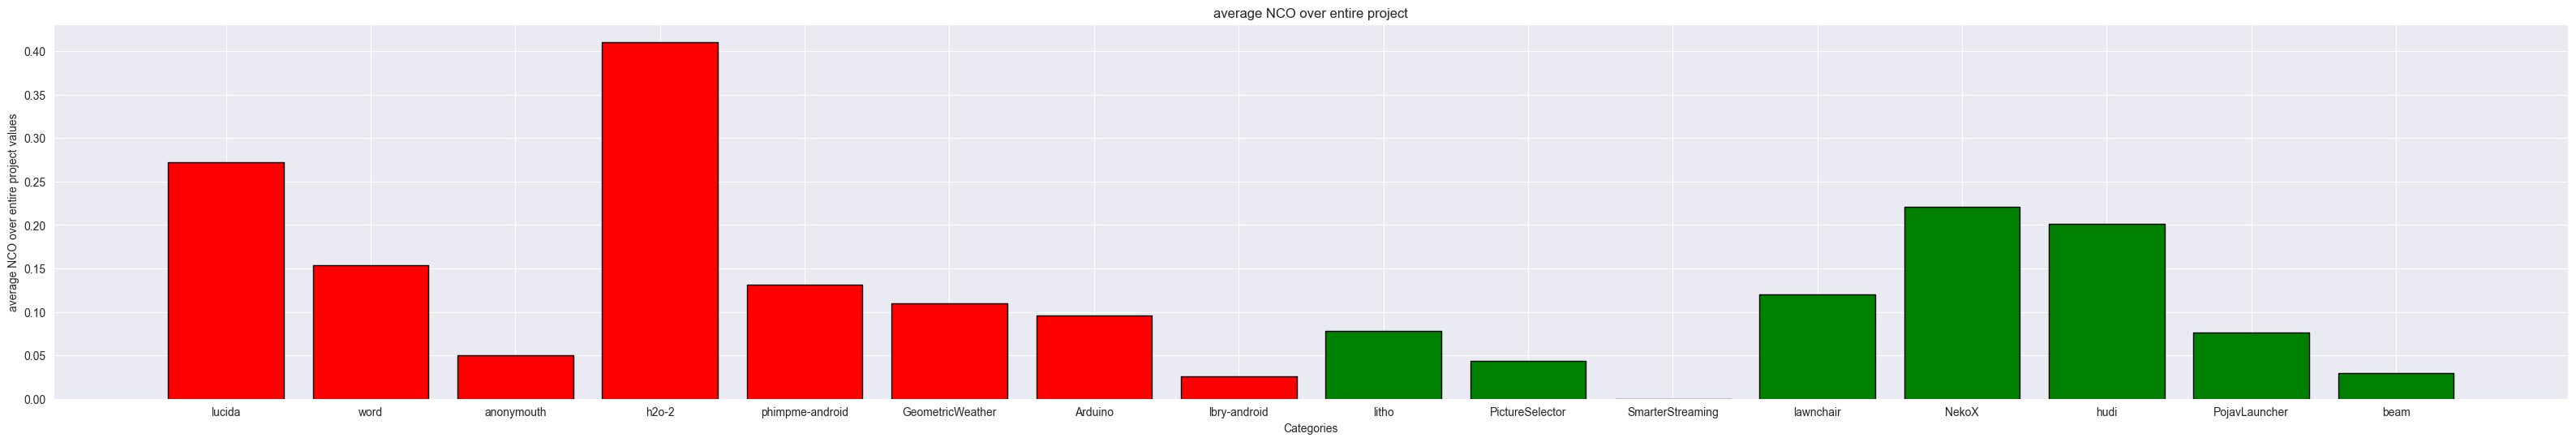

-------------------------
 weighted average RFC over entire project , should be low 


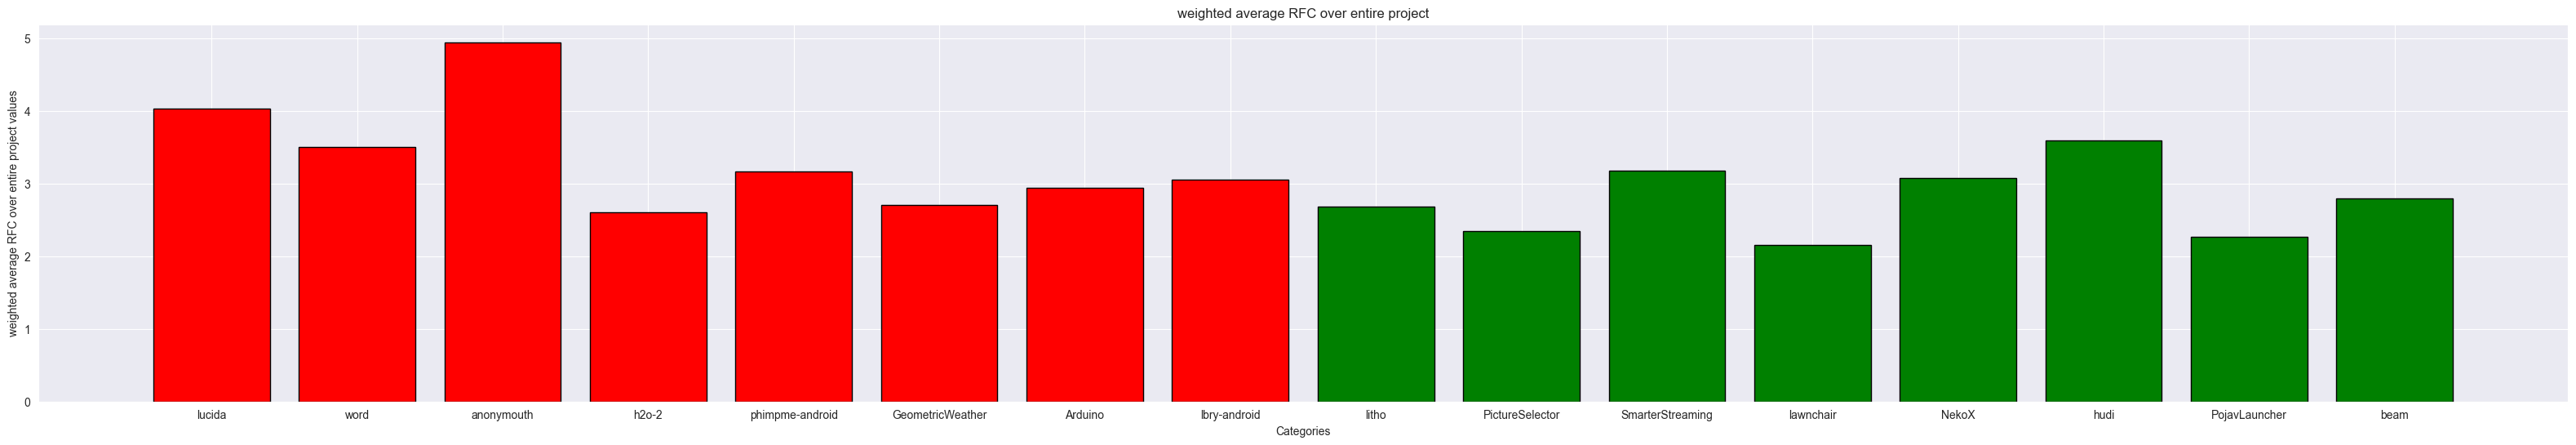

-------------------------
 weighted average LCOM over entire project , should be low 


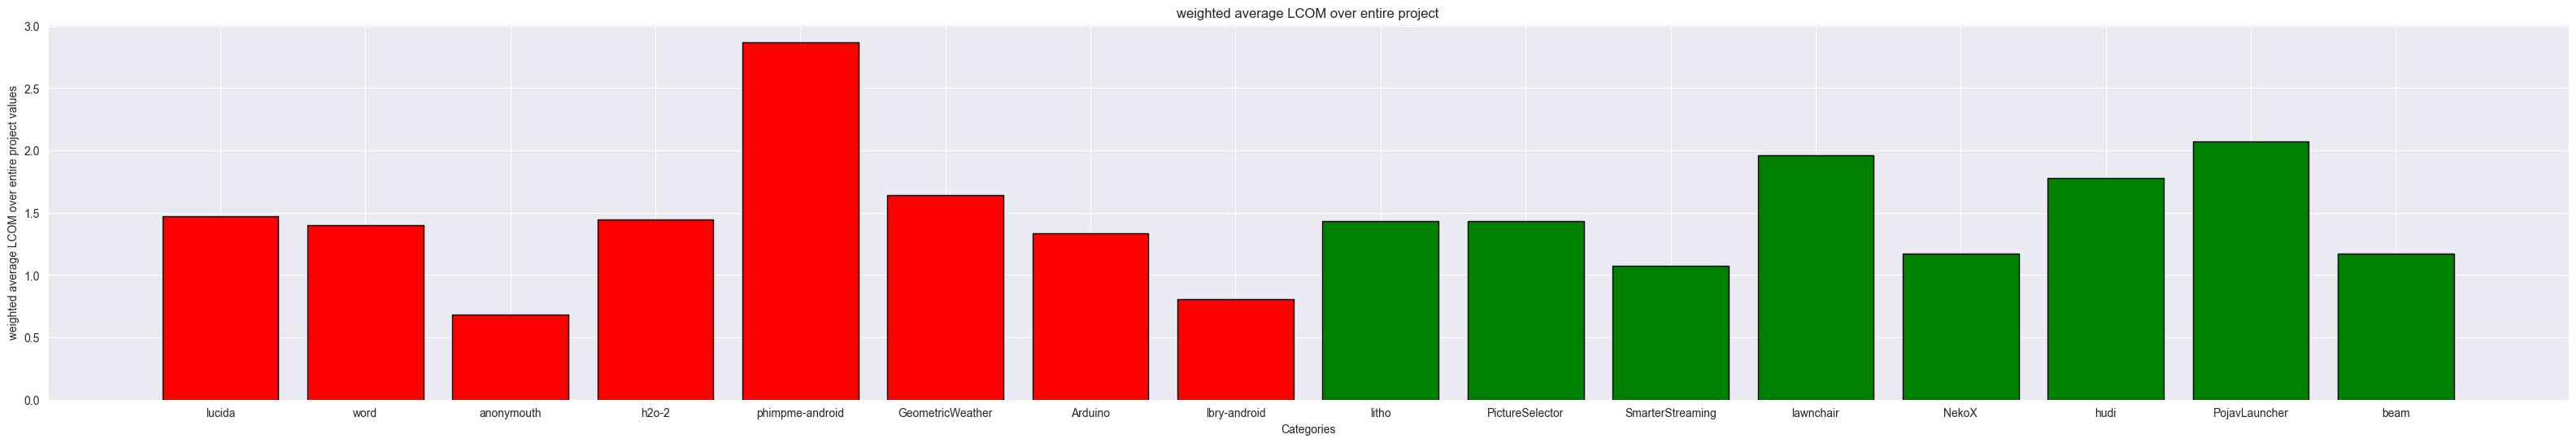

In [7]:
#display a weighted calculated average over specific or all projects. The weight is the number of methods in a class

# weighted average CBO for all projects in one graph
metric = "weighted average CBO over entire project"
data_all_projects = weighted_data_prep(3)
print(f"-------------------------\n {metric}, should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(),colours_for_projects ,  f"{metric}")

# average CBO for all projects in one graph
metric = "average CBO over entire project"
data_all_projects = data_prep(3)
print(f"-------------------------\n {metric}, should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(),colours_for_projects ,  f"{metric}")



# weighted average WMC for all projects in one graph
metric = "weighted average WMC over entire project"
data_all_projects = weighted_data_prep(7)
print(f"-------------------------\n {metric} , should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")



# weighted average DIT for all projects in one graph
metric = "weighted average DIT over entire project"
data_all_projects = weighted_data_prep(8)
print(f"-------------------------\n {metric}, should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")



# weighted average NOC for all projects in one graph
metric = "weighted average NCO over entire project"
data_all_projects = weighted_data_prep(9)
print(f"-------------------------\n {metric} , should be high \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}
#  smarter streaming has 0 for every class NCO - dunno why

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")

# average NOC for all projects in one graph
metric = "average NCO over entire project"
data_all_projects = data_prep(9)
print(f"-------------------------\n {metric} , should be high \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}
#  smarter streaming has 0 for every class NCO - dunno why

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")



# weighted average RFC for all projects in one graph
metric = "weighted average RFC over entire project"
data_all_projects = weighted_data_prep(10)
print(f"-------------------------\n {metric} , should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")



# weighted average LCOM for all projects in one graph
metric = "weighted average LCOM over entire project"
data_all_projects = weighted_data_prep(11)
print(f"-------------------------\n {metric} , should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")


-------------------------
 min / max of CBO , should be low 


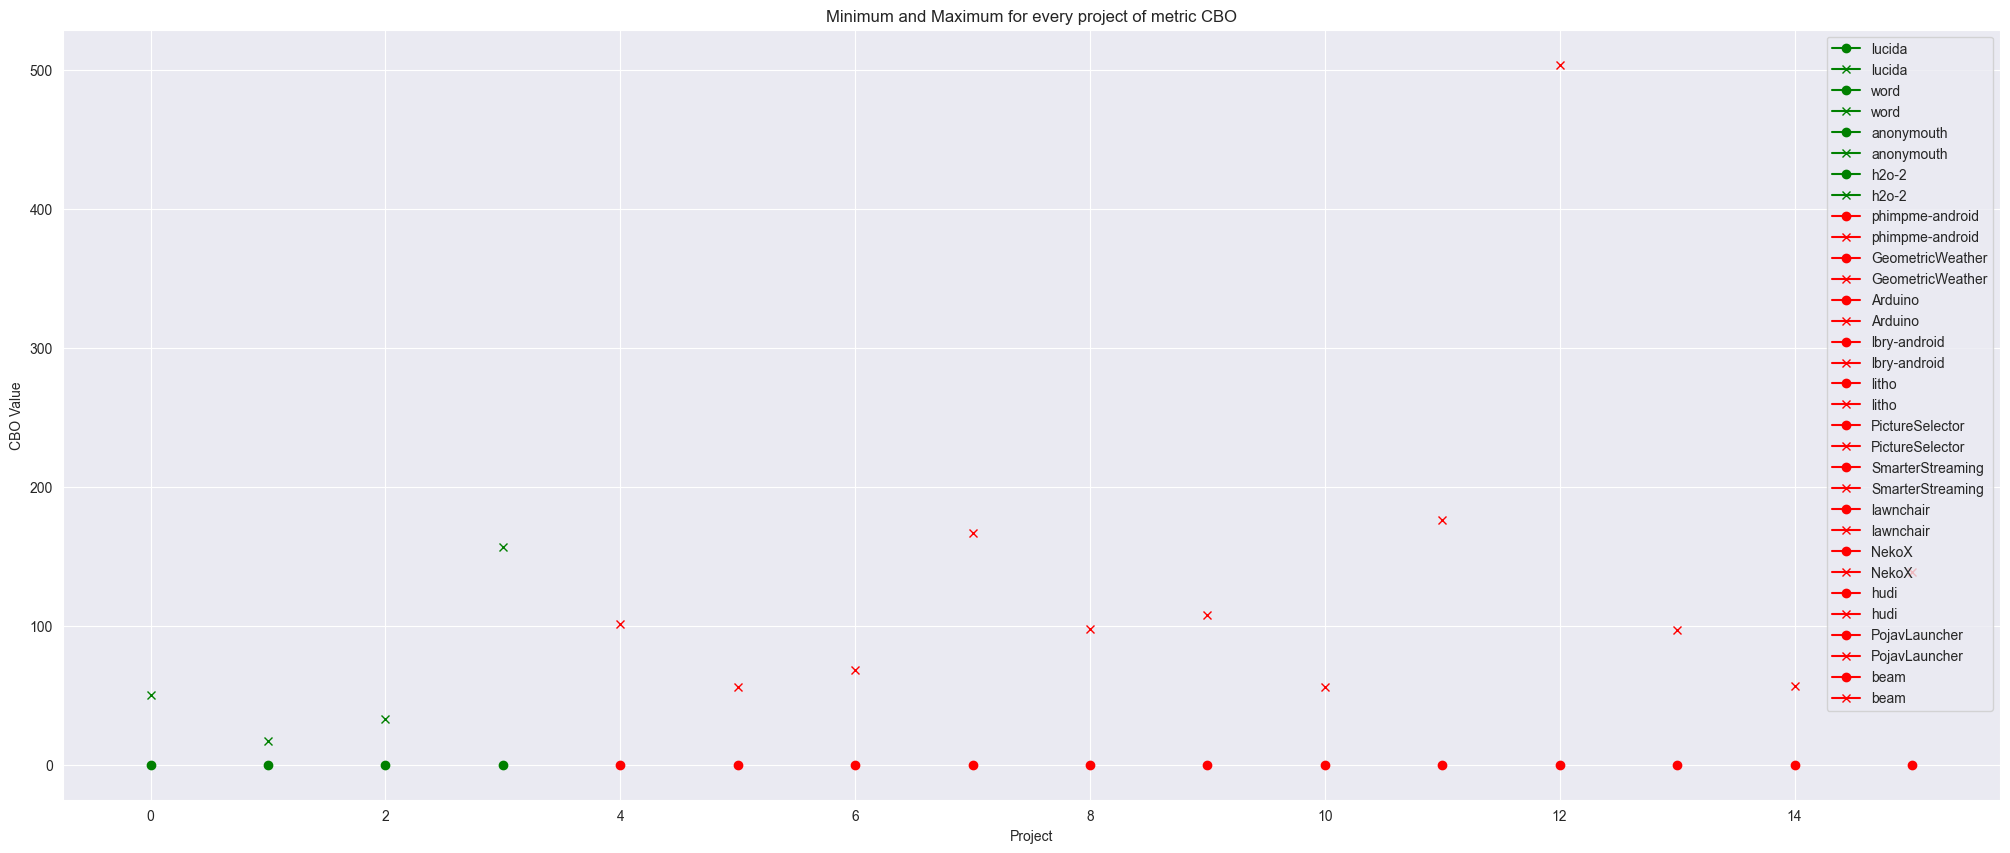

-------------------------
 min / max of WMC , should be low 


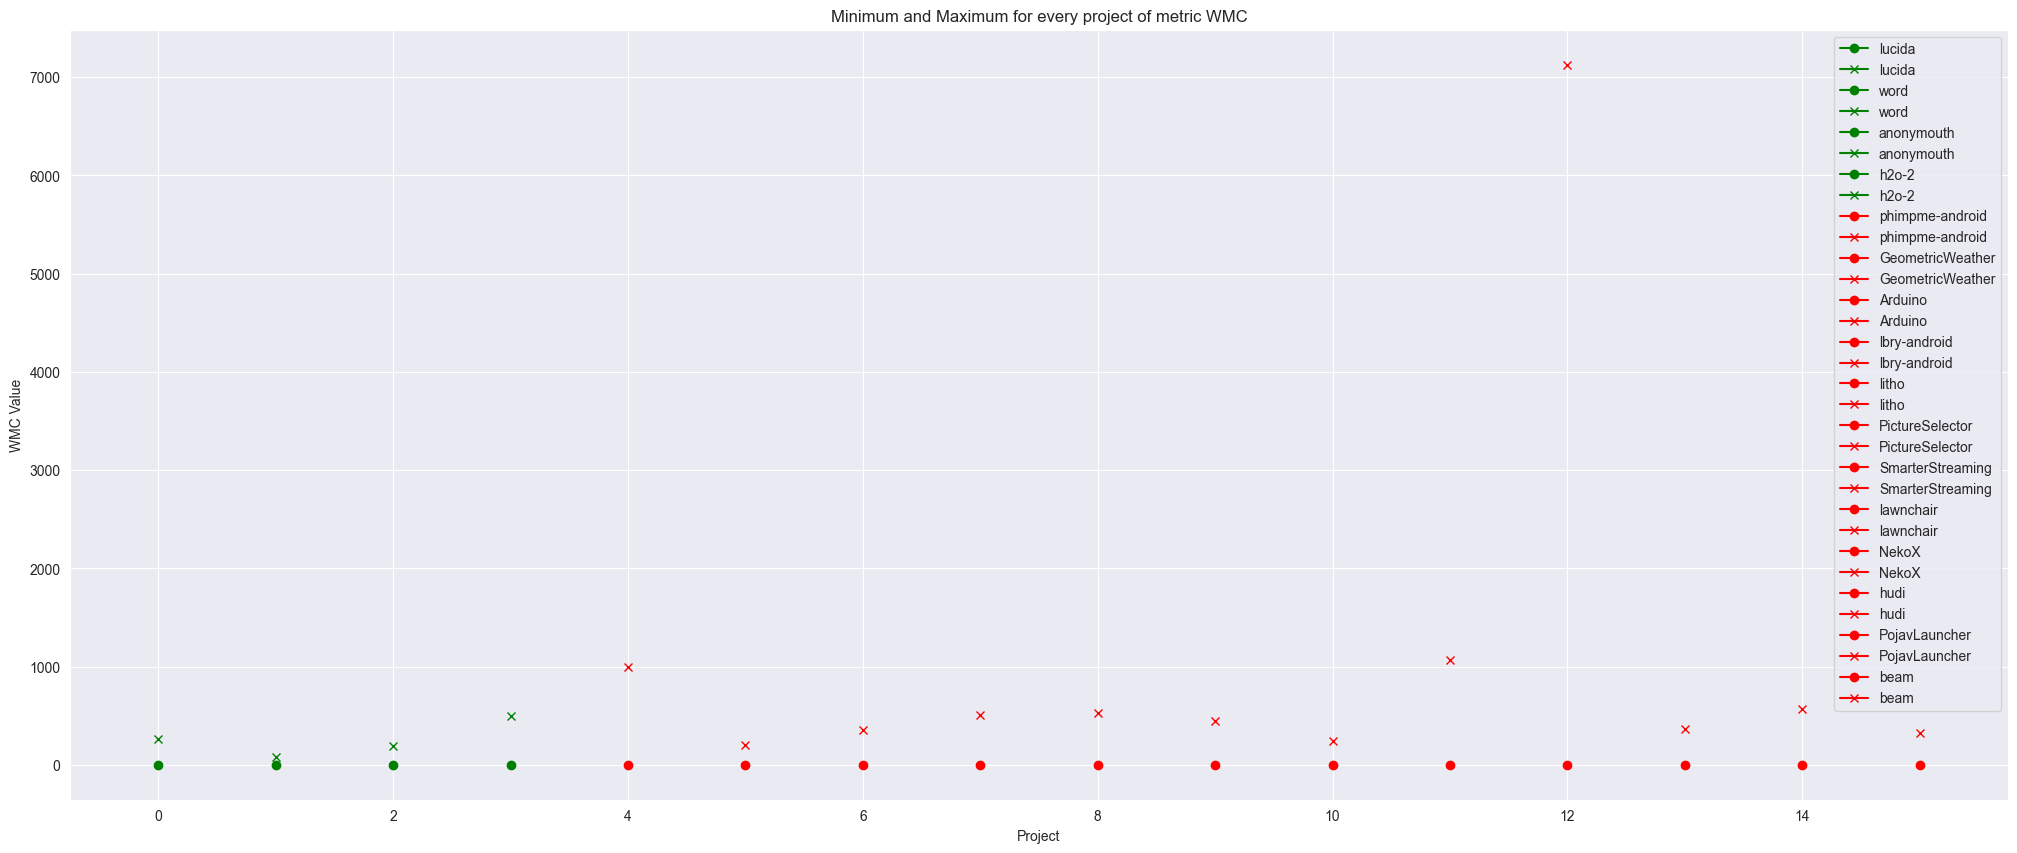

-------------------------
 min / max of DIT , should be low 


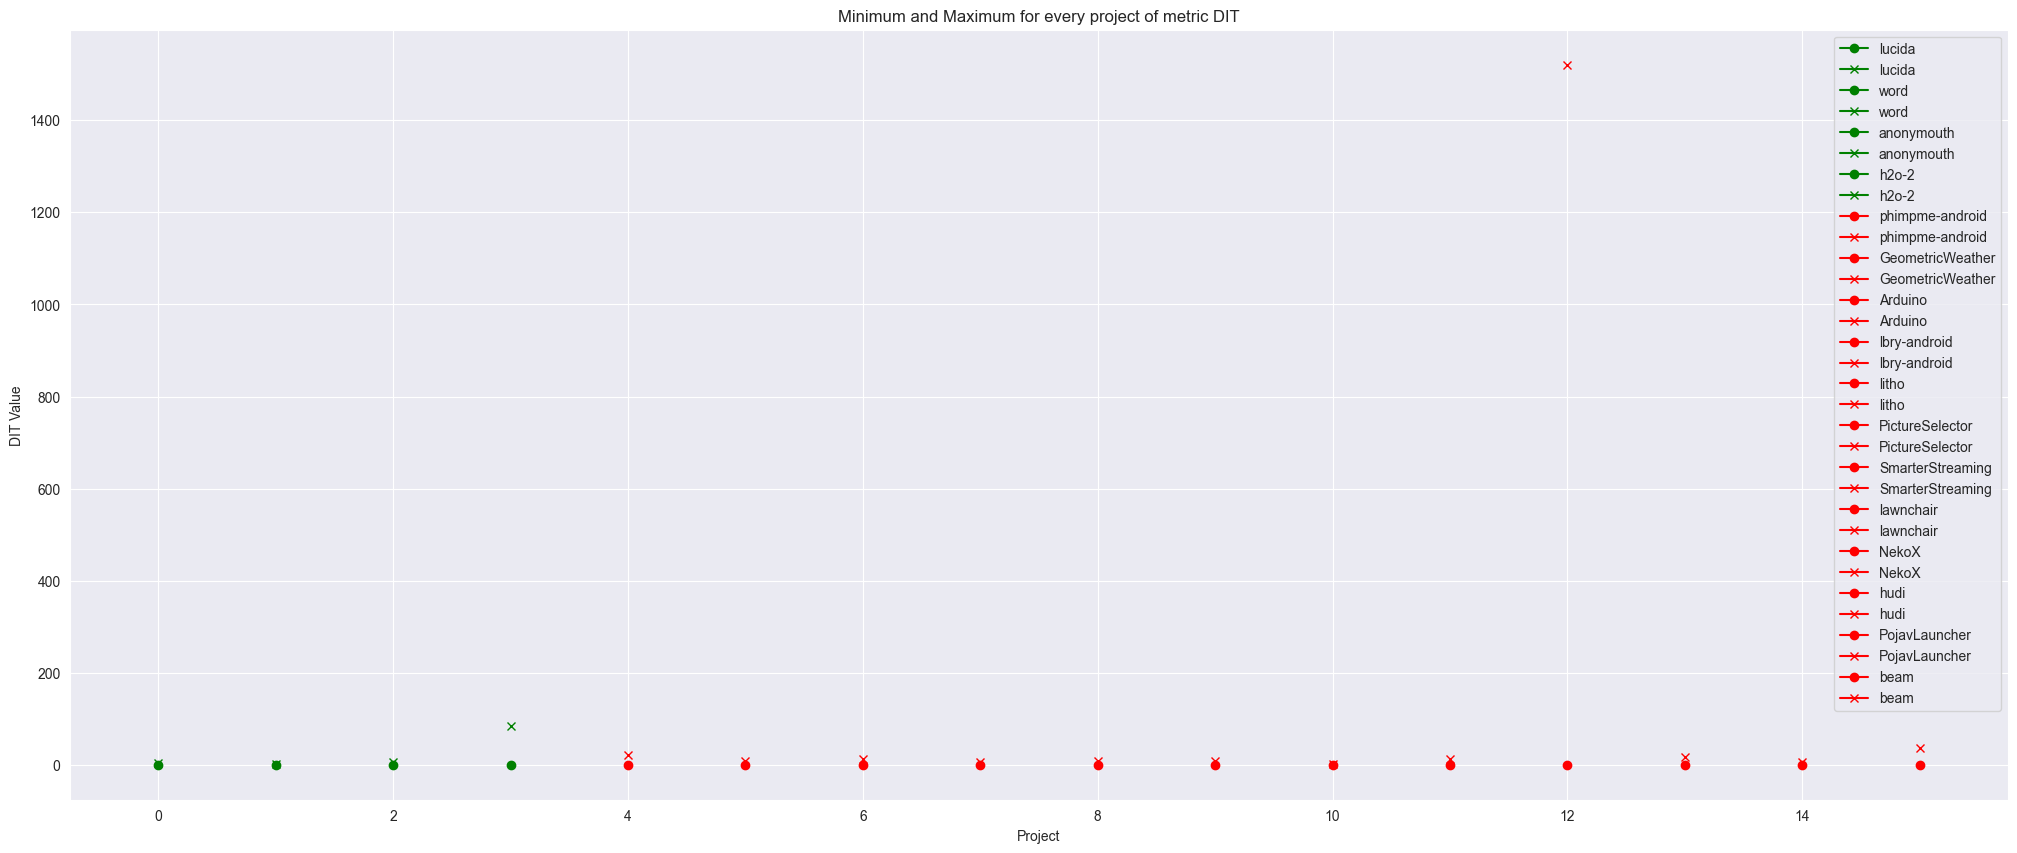

-------------------------
 min / max of NOC , should be low 


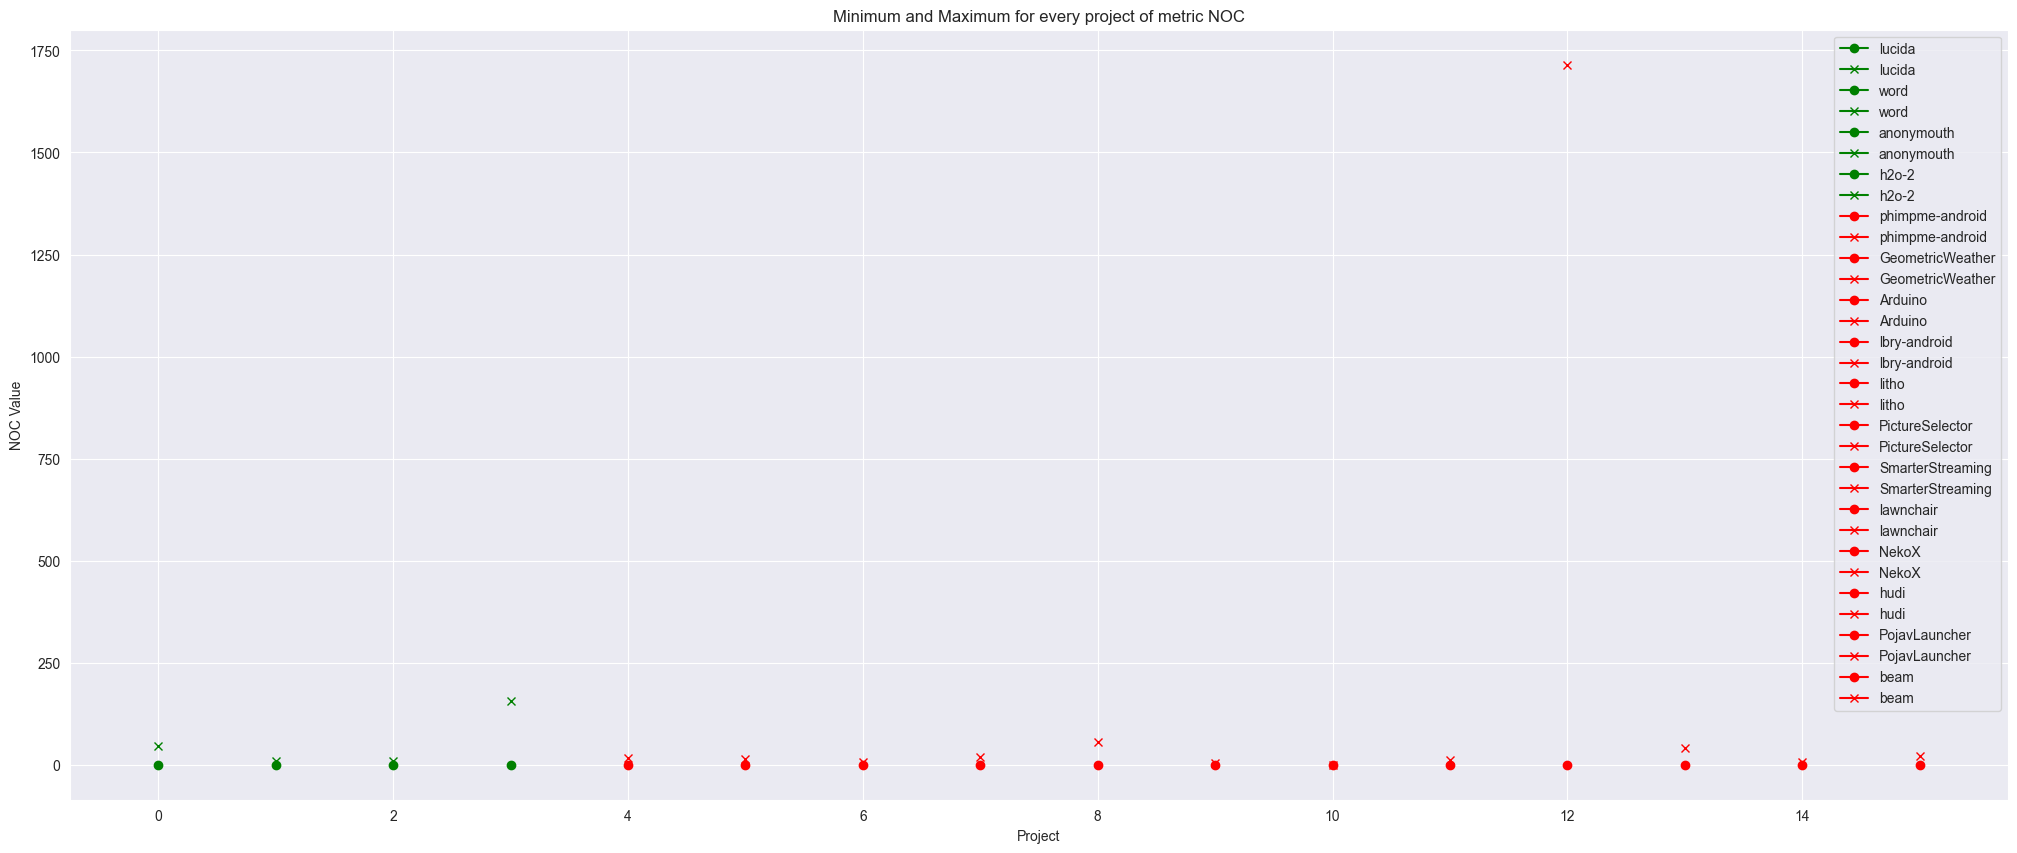

-------------------------
 min / max of RFC , should be low 


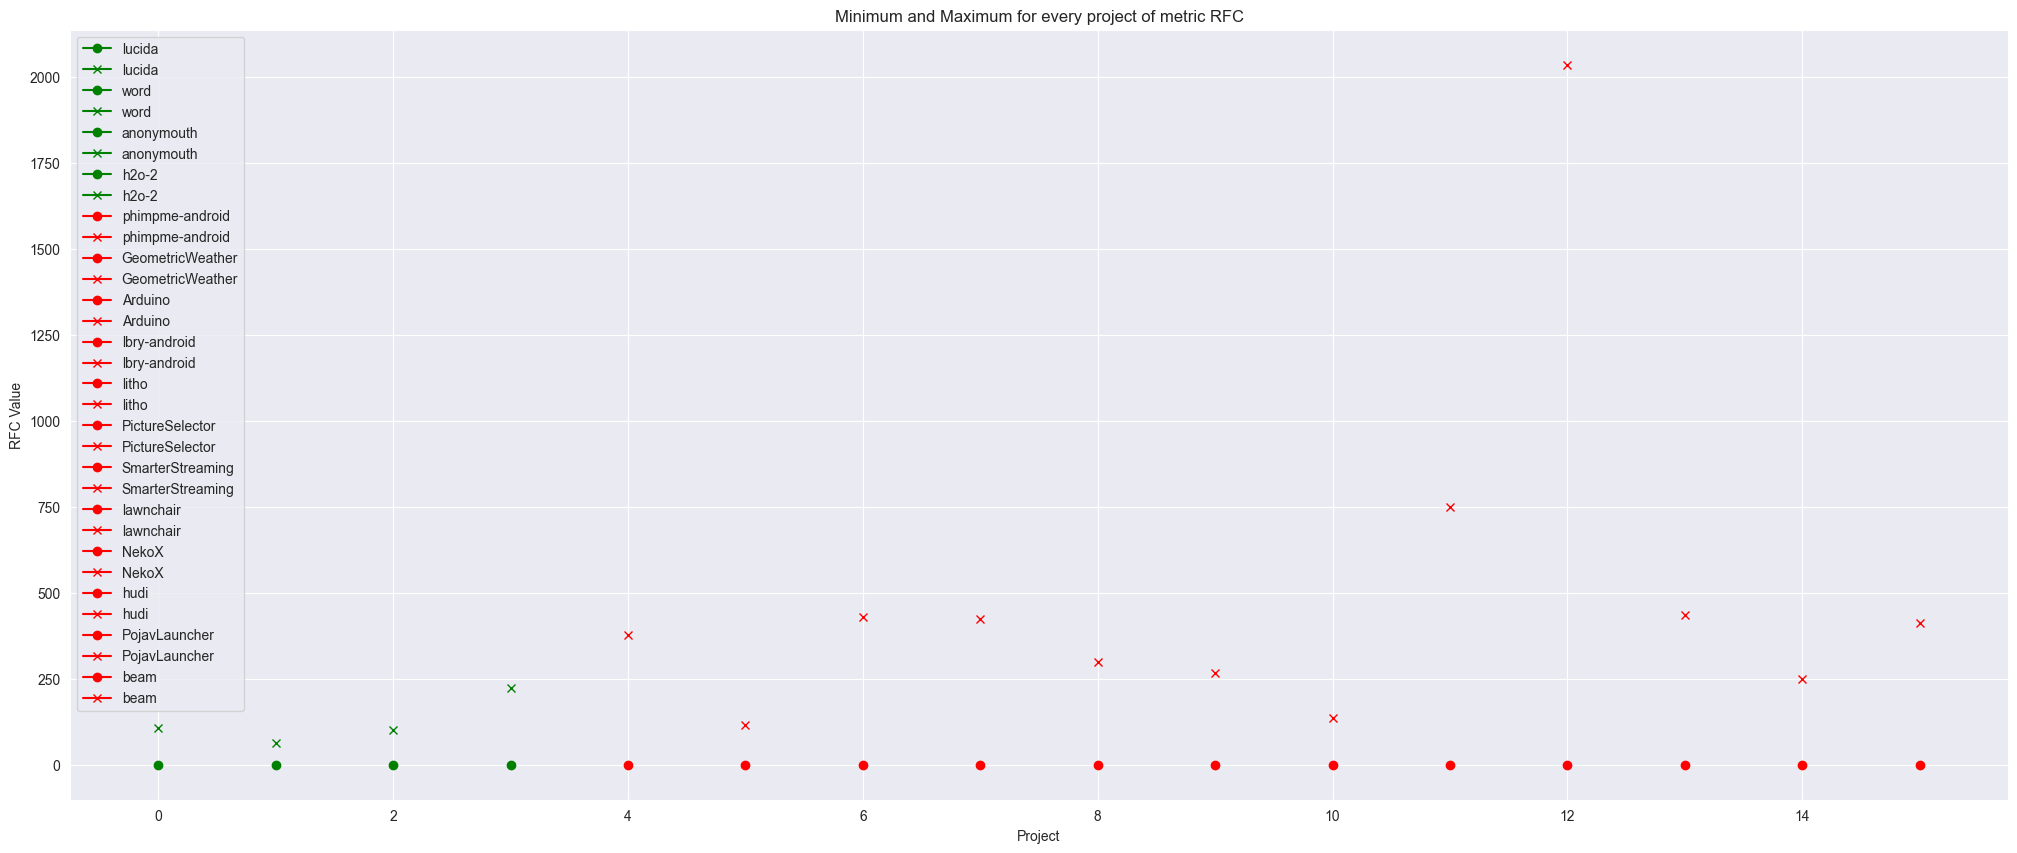

-------------------------
 min / max of LCOM , should be low 


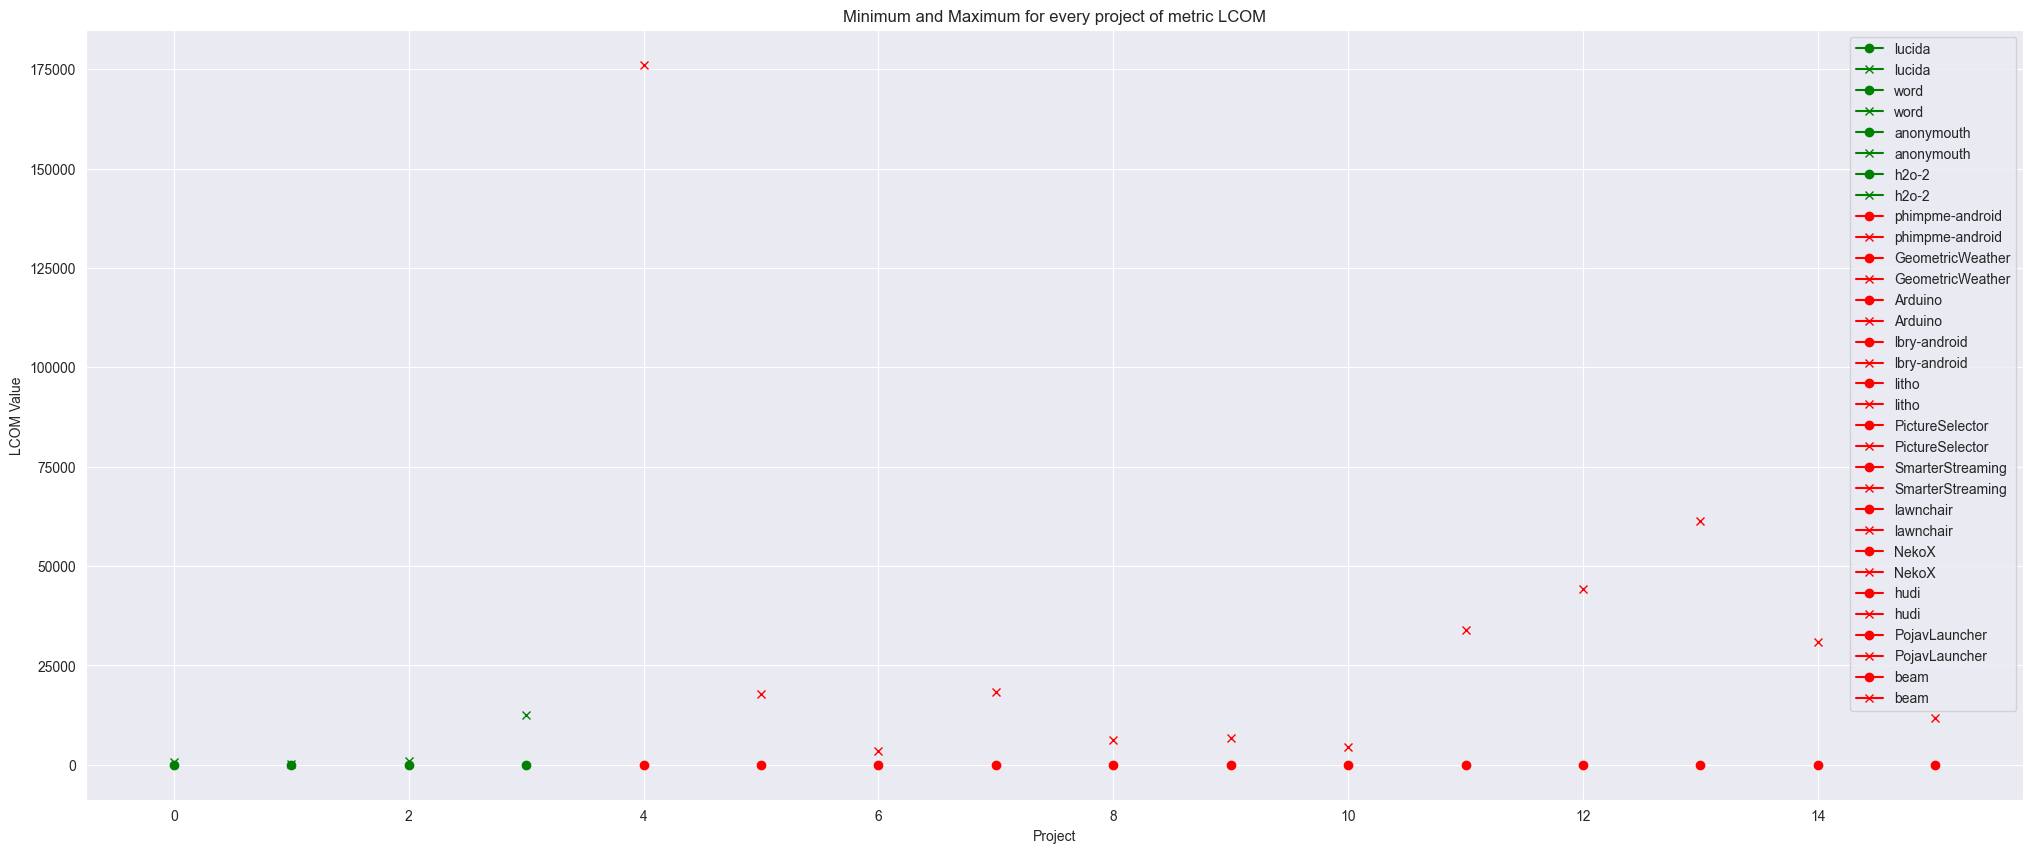

In [5]:
# display visualizations for comparing min and max values present in a project for metrics

# min/max CBO for all projects in one graph
metric = "CBO"
data_all_projects = data_prep(3)
print(f"-------------------------\n min / max of {metric} , should be low \n")

min_dict = {p:min(v) for (p,v) in data_all_projects.items()}
max_dict = {p:max(v) for (p,v) in data_all_projects.items()}

#double_line_chart(metric, min_dict.values(), max_dict.values())
double_line_chart_coloured(metric, list(min_dict.values()), list(max_dict.values()))






# min/max WMC for all projects in one graph
metric = "WMC"
data_all_projects = data_prep(7)
print(f"-------------------------\n min / max of {metric} , should be low \n")

min_dict = {p:min(v) for (p,v) in data_all_projects.items()}
max_dict = {p:max(v) for (p,v) in data_all_projects.items()}

#double_line_chart(metric, min_dict.values(), max_dict.values())
double_line_chart_coloured(metric, list(min_dict.values()), list(max_dict.values()))



# min/max DIT for all projects in one graph
metric = "DIT"
data_all_projects = data_prep(8)
print(f"-------------------------\n min / max of {metric} , should be low \n")

min_dict = {p:min(v) for (p,v) in data_all_projects.items()}
max_dict = {p:max(v) for (p,v) in data_all_projects.items()}

#double_line_chart(metric, min_dict.values(), max_dict.values())
double_line_chart_coloured(metric, list(min_dict.values()), list(max_dict.values()))



# min/max NOC for all projects in one graph
metric = "NOC"
data_all_projects = data_prep(9)
print(f"-------------------------\n min / max of {metric} , should be low \n")

min_dict = {p:min(v) for (p,v) in data_all_projects.items()}
max_dict = {p:max(v) for (p,v) in data_all_projects.items()}

#double_line_chart(metric, min_dict.values(), max_dict.values())
double_line_chart_coloured(metric, list(min_dict.values()), list(max_dict.values()))




# min/max RFC for all projects in one graph
metric = "RFC"
data_all_projects = data_prep(10)
print(f"-------------------------\n min / max of {metric} , should be low \n")

min_dict = {p:min(v) for (p,v) in data_all_projects.items()}
max_dict = {p:max(v) for (p,v) in data_all_projects.items()}

#double_line_chart(metric, min_dict.values(), max_dict.values())
double_line_chart_coloured(metric, list(min_dict.values()), list(max_dict.values()))





# min/max LCOM for all projects in one graph
metric = "LCOM"
data_all_projects = data_prep(11)
print(f"-------------------------\n min / max of {metric} , should be low \n")

min_dict = {p:min(v) for (p,v) in data_all_projects.items()}
max_dict = {p:max(v) for (p,v) in data_all_projects.items()}

#double_line_chart(metric, min_dict.values(), max_dict.values())
double_line_chart_coloured(metric, list(min_dict.values()), list(max_dict.values()))





In [ ]:
#display a calculated average over specific or all projects

# average CBO for all projects in one graph
metric = "average CBO over entire project"
data_all_projects = data_prep(3)
print(f"-------------------------\n {metric}, should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(),colours_for_projects ,  f"{metric}")



# average WMC for all projects in one graph
metric = "average WMC over entire project"
data_all_projects = data_prep(7)
print(f"-------------------------\n {metric} , should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")



# average DIT for all projects in one graph
metric = "average DIT over entire project"
data_all_projects = data_prep(8)
print(f"-------------------------\n {metric}, should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")



# average NOC for all projects in one graph
metric = "average NCO over entire project"
data_all_projects = data_prep(9)
print(f"-------------------------\n {metric} , should be high \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}
#  smarter streaming has 0 for every class NCO - dunno why

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")



# average RFC for all projects in one graph
metric = "average RFC over entire project"
data_all_projects = data_prep(10)
print(f"-------------------------\n {metric} , should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")



# average LCOM for all projects in one graph
metric = "average LCOM over entire project"
data_all_projects = data_prep(11)
print(f"-------------------------\n {metric} , should be low \n")

average_dict = {p:sum(v)/len(v) for (p,v) in data_all_projects.items()}

bar_chart(average_dict.keys(), average_dict.values(), colours_for_projects,  f"{metric}")


In [ ]:
#display one metric at a time for specific or all projects

#CBO, coupling between objects
metric = "CBO"
data_all_projects = data_prep(4)
print(f"-------------------------\n {metric} \n")
for p in data_all_projects:
    #line_chart(f"Coupling between objects for {project}",  f"{metric}", data[p])
    histogram(f"Coupling between objects for {p}", f"{metric}", data_all_projects[p])
    log_histogram(f"Coupling between objects for {p}", f"{metric}", data_all_projects[p])
    #boxplot( f"{metric}", data_all_projects[p])


#NOC, number of children
metric = "NOC"
data_all_projects = data_prep(10)
print(f"-------------------------\n {metric} \n")
for p in data_all_projects:
    #line_chart(f"Coupling between objects for {project}",  f"{metric}", data[p])
    histogram(f"Coupling between objects for {p}", f"{metric}", data_all_projects[p])
    log_histogram(f"Coupling between objects for {p}", f"{metric}", data_all_projects[p])
    #boxplot( f"{metric}", data_all_projects[p])
    